In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.coordinates import SkyCoord
from astropy import units as u
import os

In [2]:
df = pd.read_csv('AllGiants_Predict2023.csv')
len(df)

148477

In [3]:
def estimate_cartesian_coordinates_ra_dec(D, ra, dec):
    icrs = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    galactic = icrs.galactic
    l_rad = galactic.l.radian
    b_rad = galactic.b.radian
    
    X = D * np.cos(b_rad) * np.cos(l_rad)
    Y = D * np.cos(b_rad) * np.sin(l_rad)
    z = D * np.sin(b_rad)
    
    return X, Y, z

In [4]:
def estimate_Galactocentric_radius(R_0, D, ra, dec, z):
    # Convert RA and DEC to Galactic coordinates (l, b)
    icrs = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    galactic = icrs.galactic
    l = galactic.l.deg  # Galactic longitude in degrees
    
    # Calculate Galactocentric radius
    R = np.sqrt(R_0**2 - 2 * R_0 * D * np.cos(np.radians(l)) + D**2 + z**2)
    return R

In [5]:
def plot_data(D, z, c, cmap, c_label, save_with_mc=True):
    fig, ax = plt.subplots(figsize=(14, 10))
    plt.tick_params(axis='x', labelsize=30) 
    plt.tick_params(axis='y', labelsize=30)
    plt.xlabel(r'$R$ (kpc)', fontsize=30)
    plt.ylabel(r'$Z$ (kpc)', fontsize=30)

    # Create a density plot
    density = ax.hexbin(D, z, C=c, cmap=cmap, gridsize=200, mincnt=1)

    # Add a colorbar with improved visibility
    cbar = plt.colorbar(density, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    cbar.set_label(c_label, fontsize=30)  # Label for the colorbar

    # Set the font size of colorbar labels
    cbar.ax.tick_params(labelsize=30)  # Adjust the font size as needed
    plt.xlim(-2, 22)
    plt.ylim(-15, 15)
    # Tighten the layout
    plt.tight_layout()

    # Determine the filename format based on the save_with_mc argument
    if save_with_mc:
        file_format = "_MC"
    else:
        file_format = ""

    # Replace square brackets with underscores in the label
    file_label = c_label.replace("/", "_")

    # Save the plot with the chosen filename format
    plt.savefig(f"ZvsR_plots/plot_ZvsR_{file_label}{file_format}.pdf")

    plt.show()


In [6]:
ra = df["RA"]
dec = df["DEC"]


In [7]:
# distance from GAIA
D = df["Dist"] / 1000

In [8]:
X, Y, Z = estimate_cartesian_coordinates_ra_dec(D, ra, dec)

In [9]:
R = np.sqrt(X**2 + Y**2)

In [10]:
# Dictionary to map column names to their corresponding labels
column_label_mapping = {
    "NNpredict_Apogee_TEFF": "Teff",
    "NNpredict_Apogee_LOGG": "logg",
    "NNpredict_Apogee_FE_H": "[Fe/H]",
    "NNpredict_Apogee_ALPHA_M": "[α/M]",
    "NNpredict_Apogee_C_FE": "[C/Fe]",
    "NNpredict_Apogee_MG_FE": "[Mg/Fe]",
    "NNpredict_Apogee_SI_FE": "[Si/Fe]",
    "NNpredict_Apogee_CI_FE": "[C/Fe]",
    "NNpredict_Apogee_O_FE": "[O/Fe]",
    "NNpredict_Apogee_AL_FE": "[Al/Fe]",
    "NNpredict_Apogee_TI_FE": "[Ti/Fe]",
    "NNpredict_Apogee_MN_FE": "[Mn/Fe]",
}

# Example usage:
# column_label_mapping["NNpredict_Apogee_C_FE"] will return "[C/Fe]"

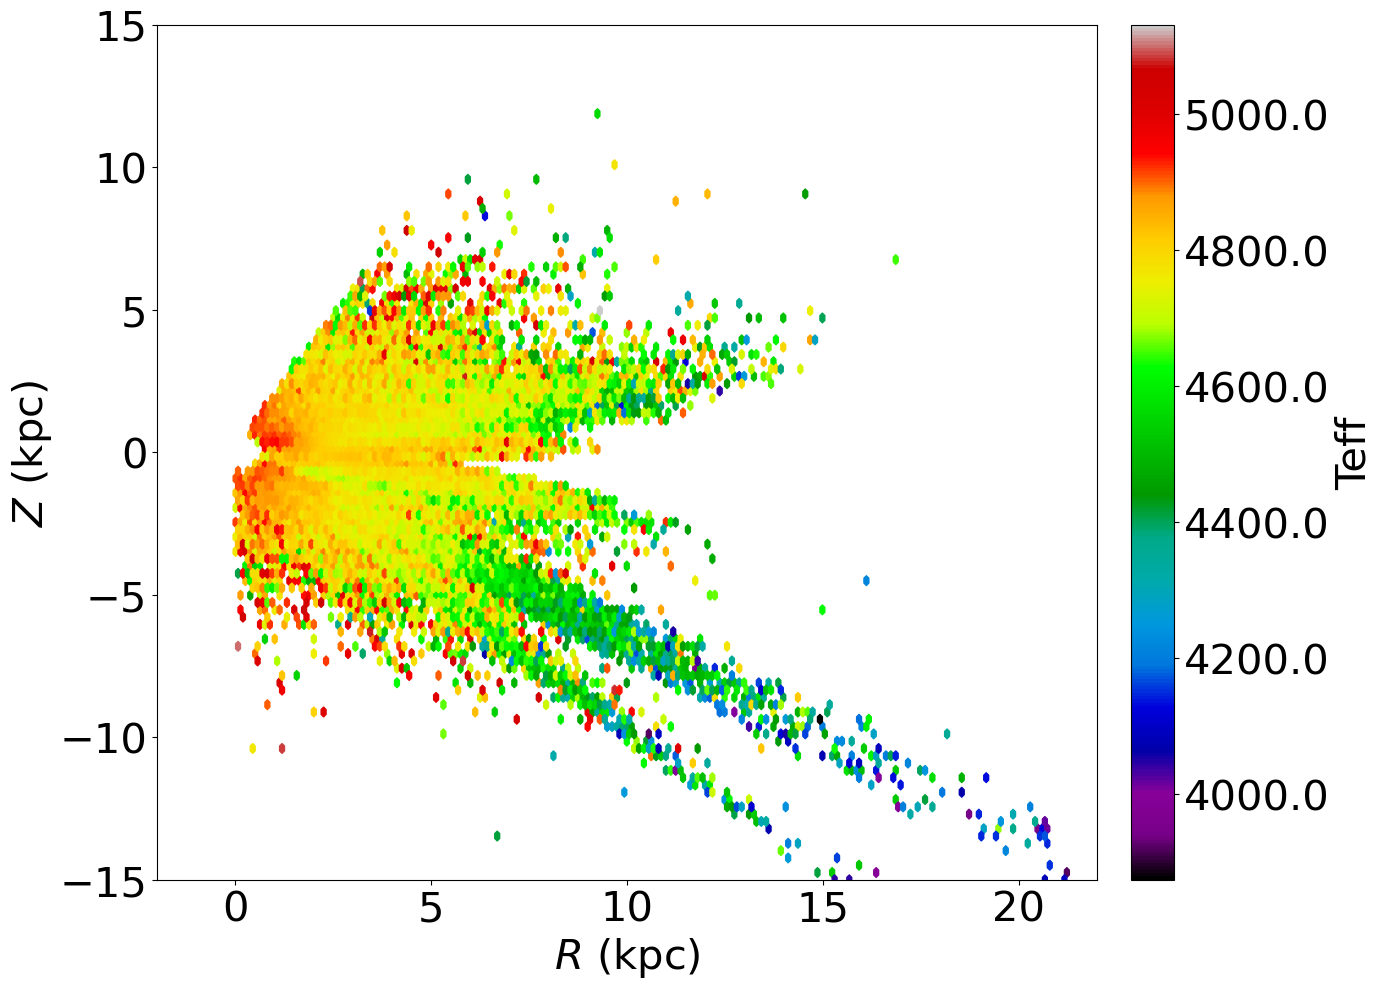

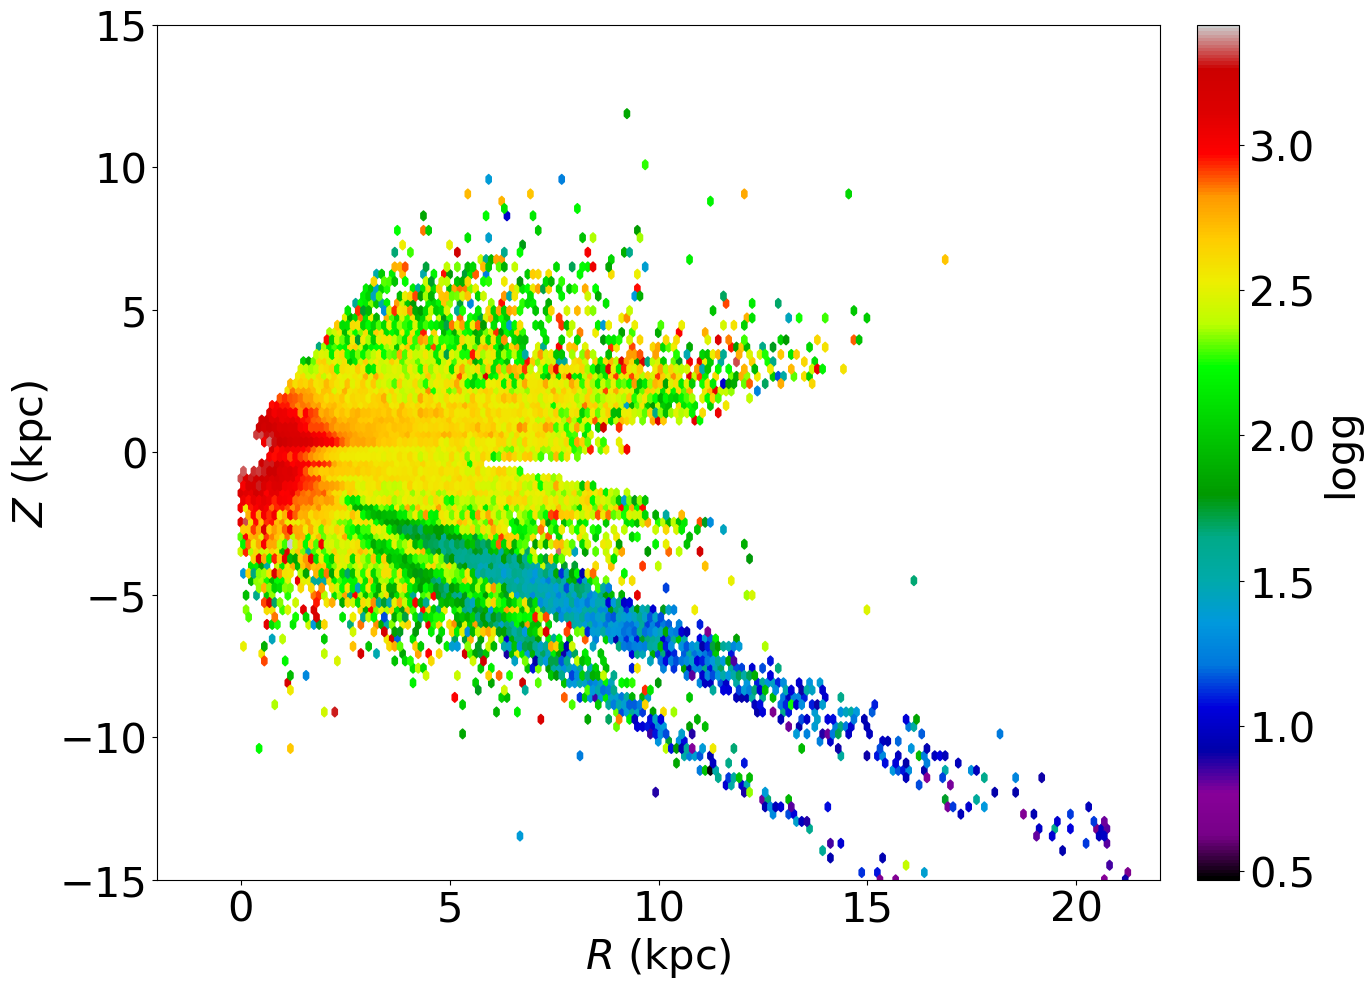

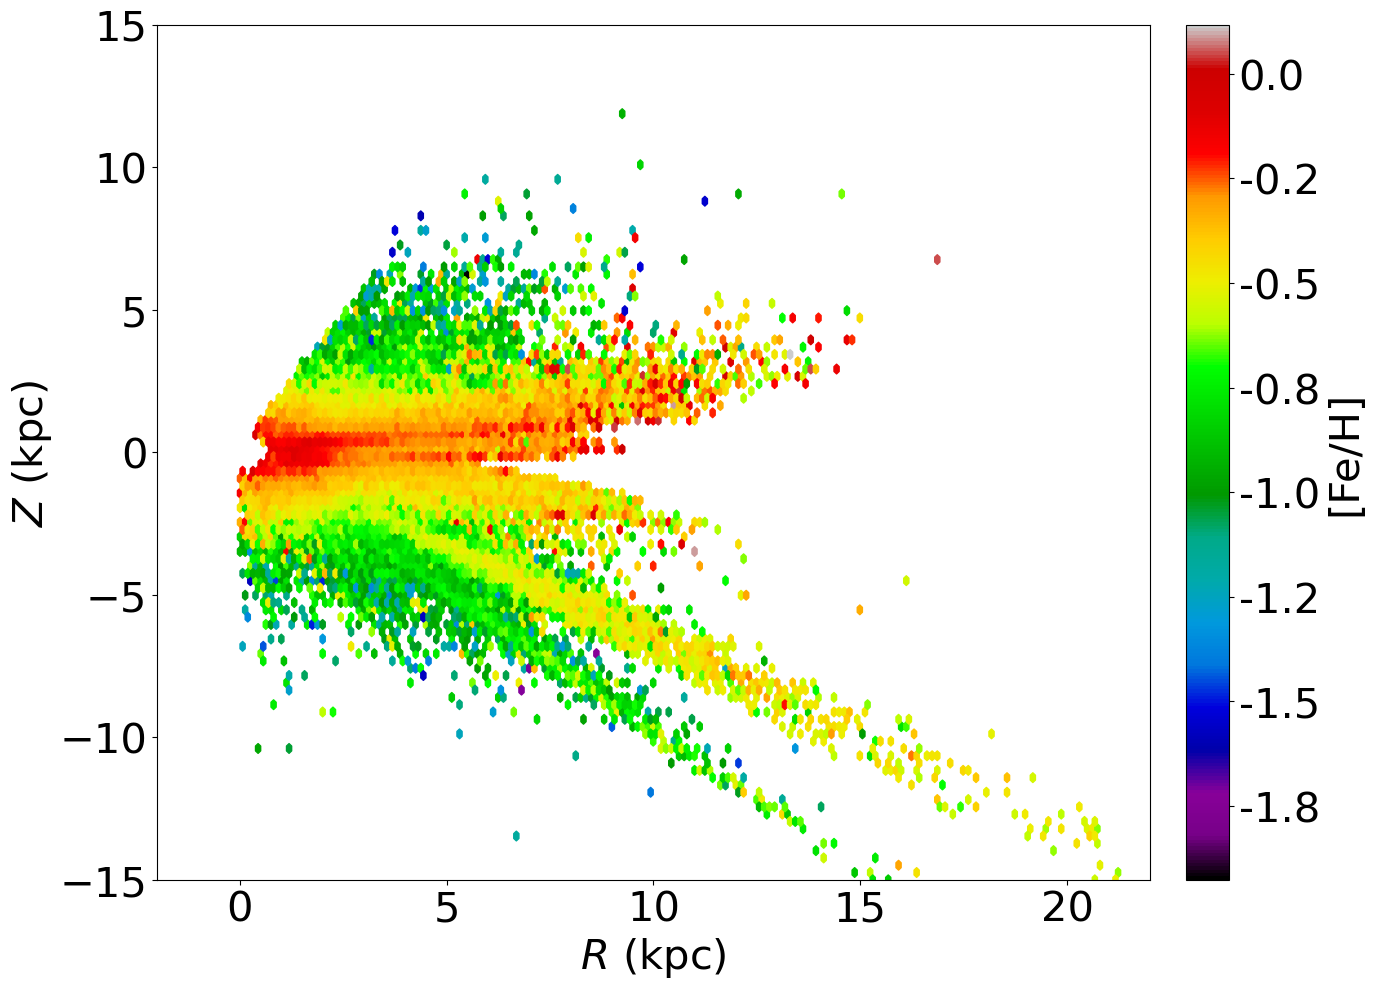

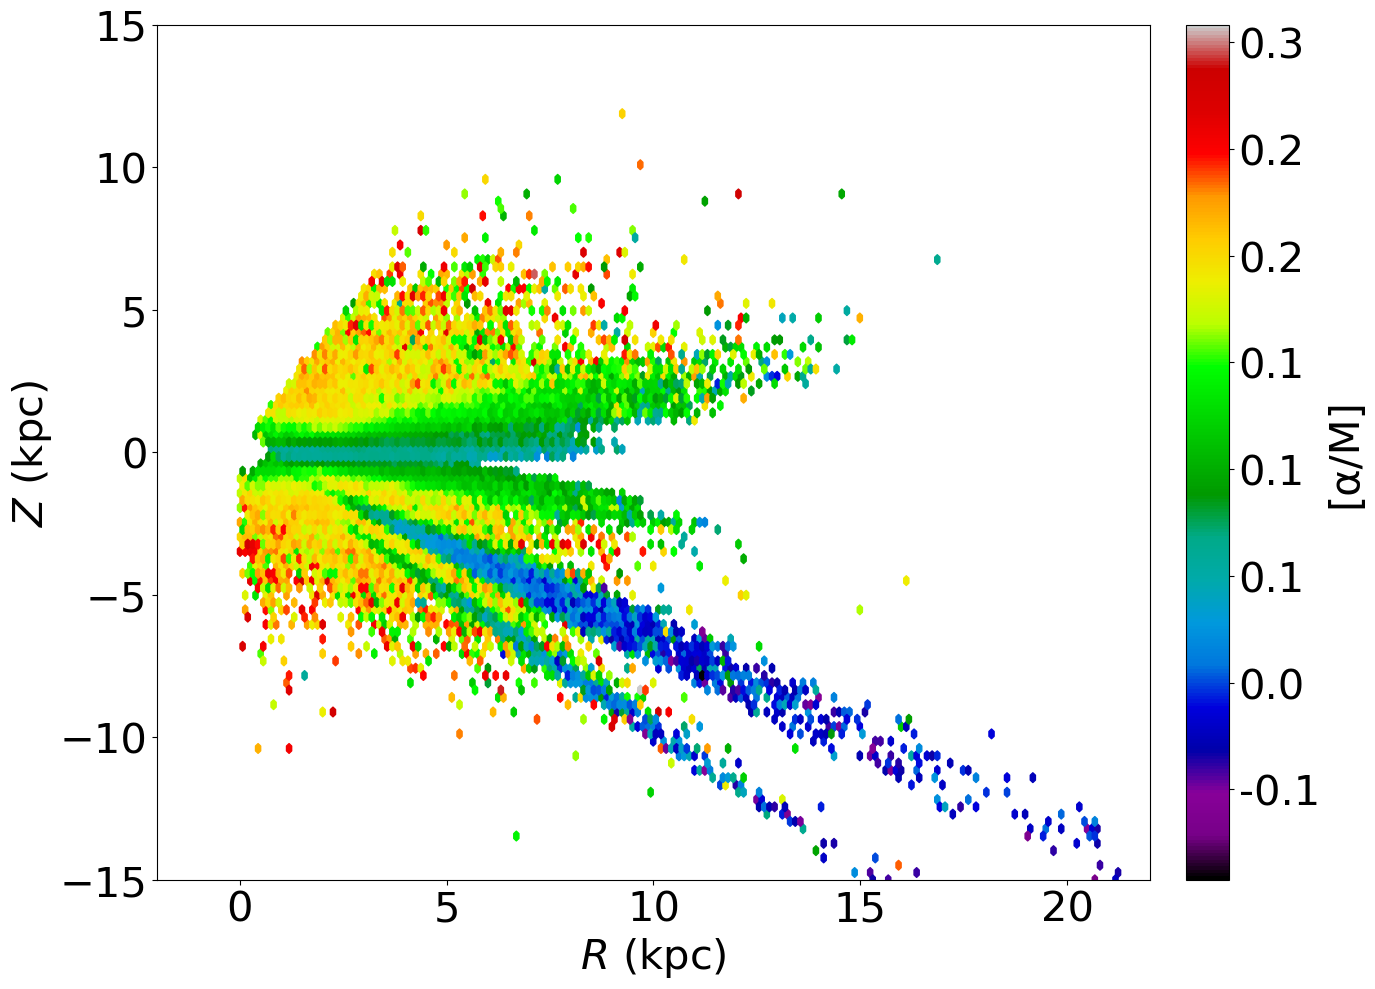

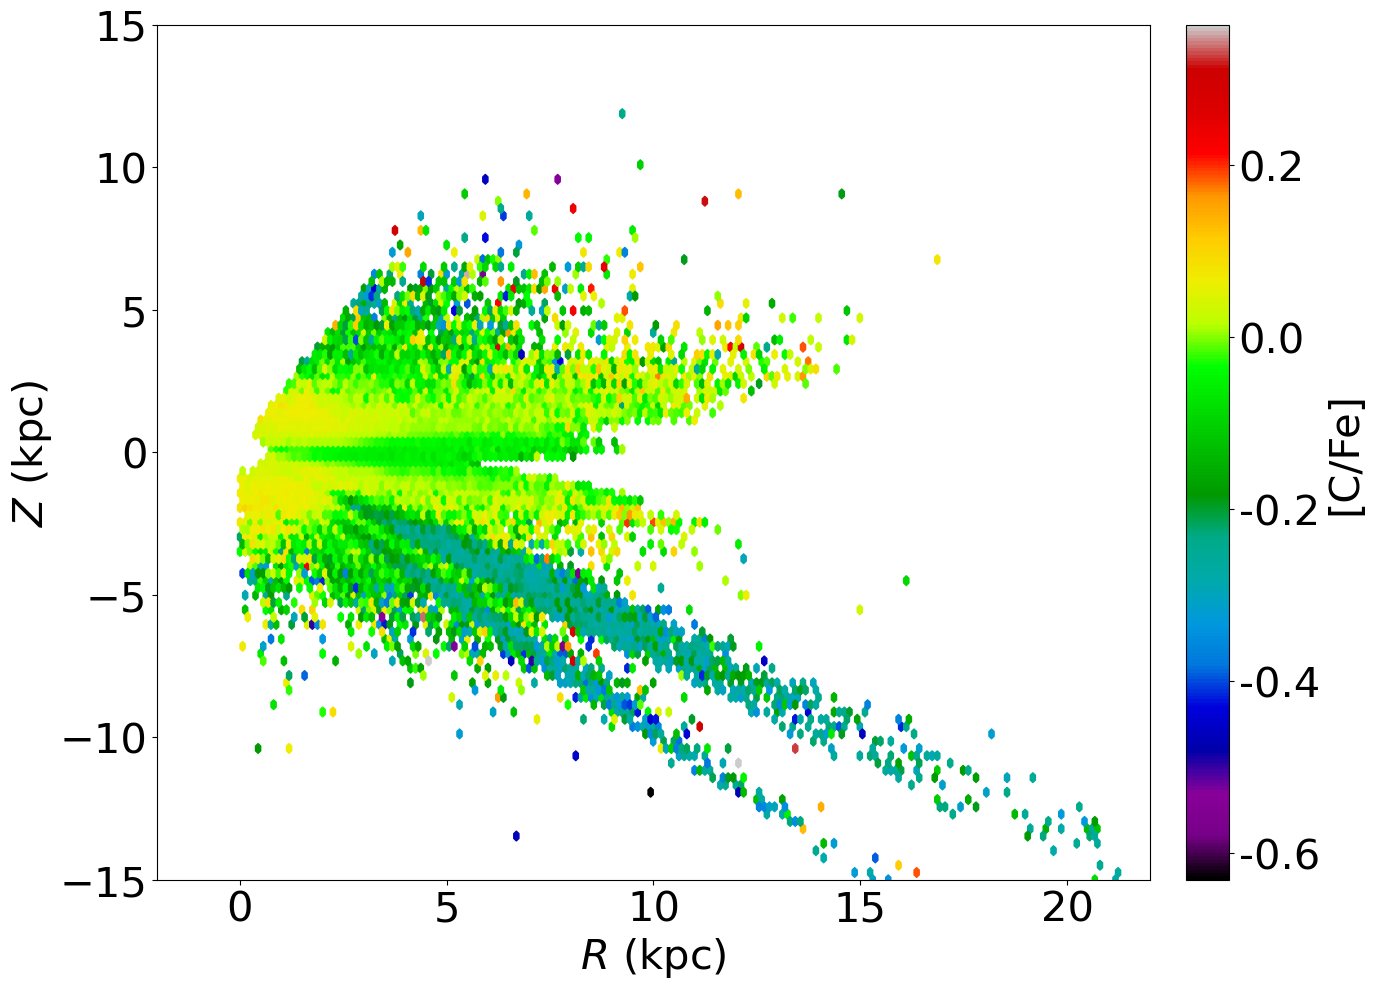

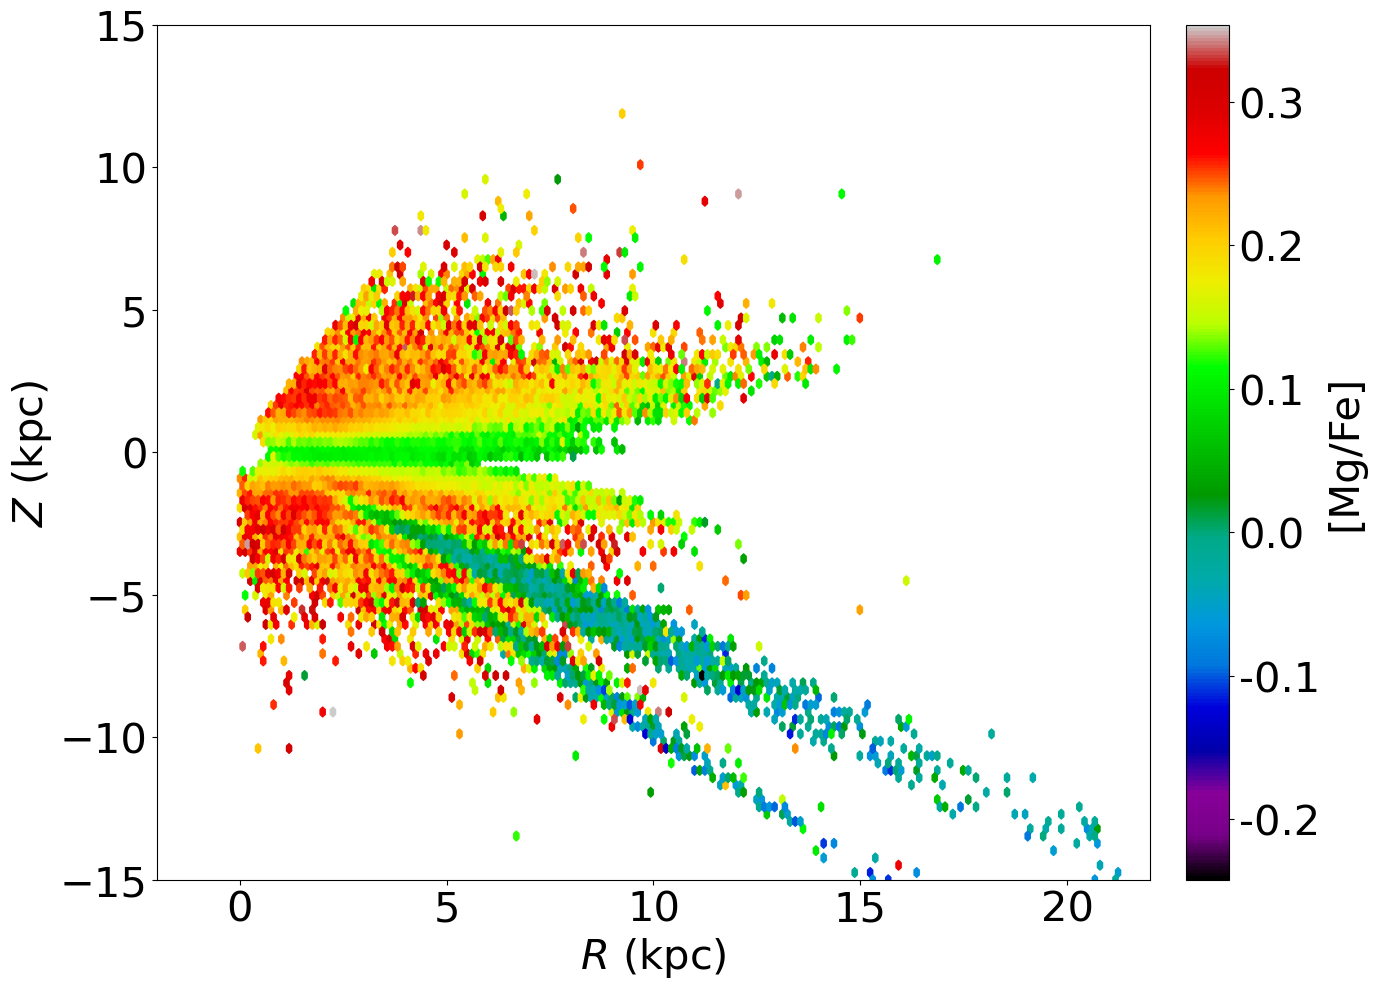

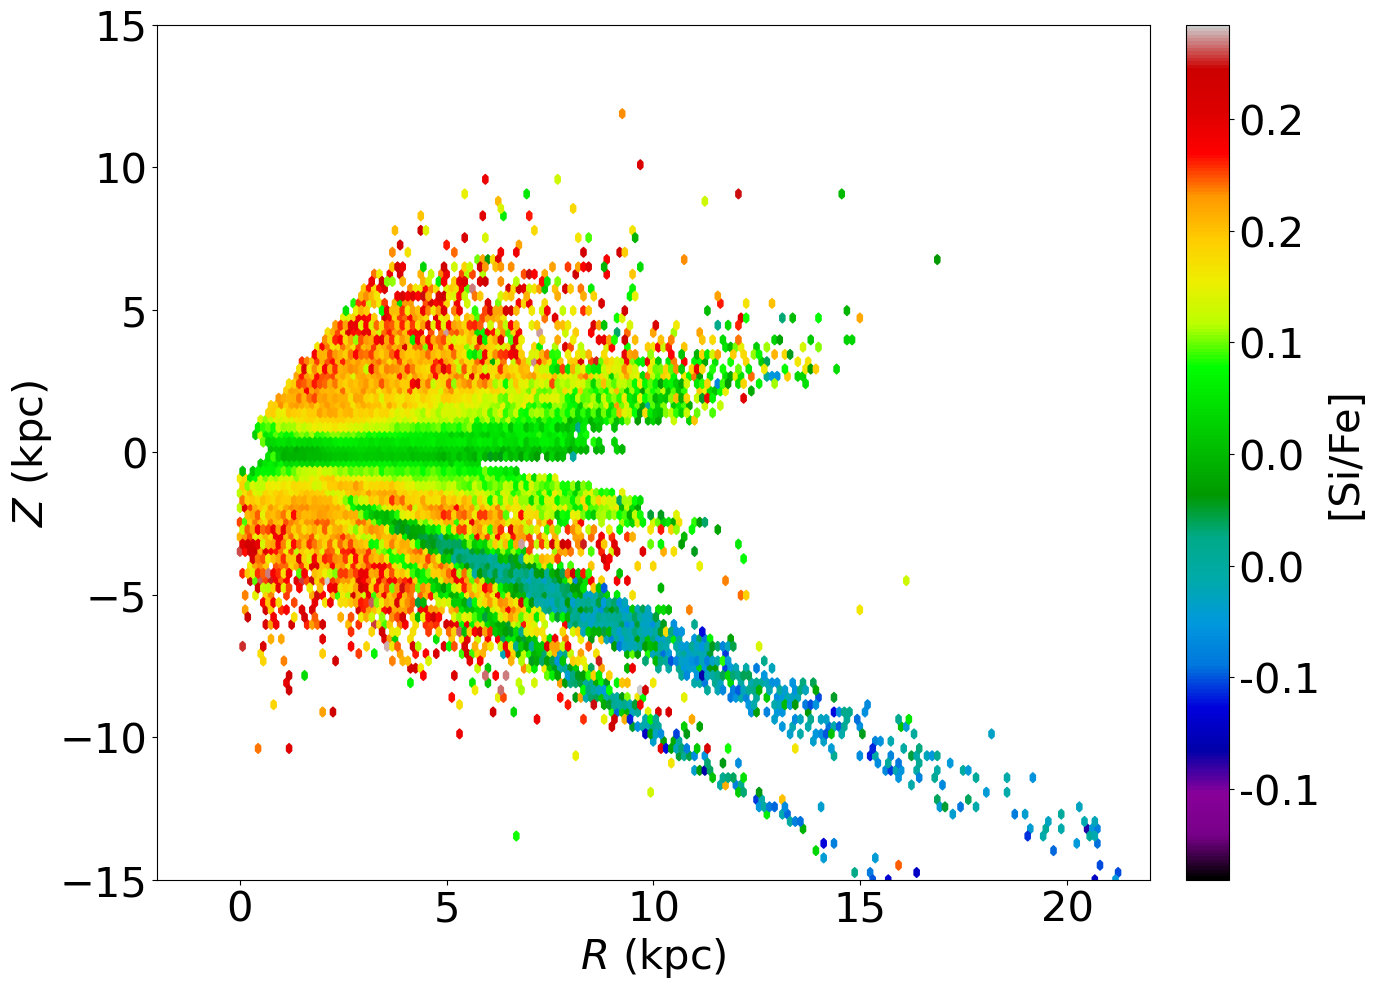

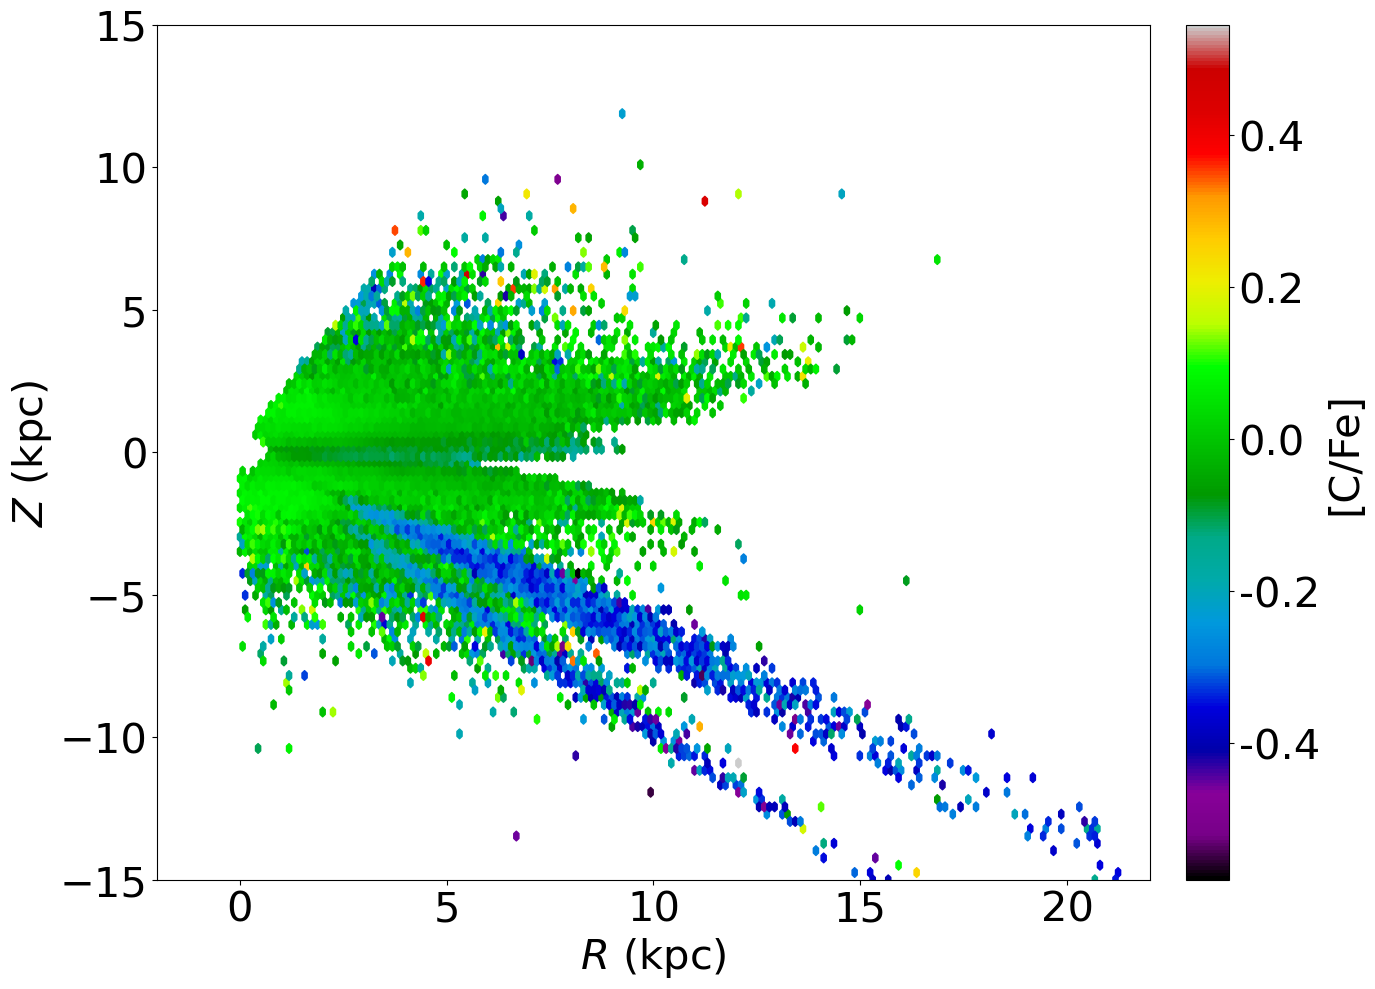

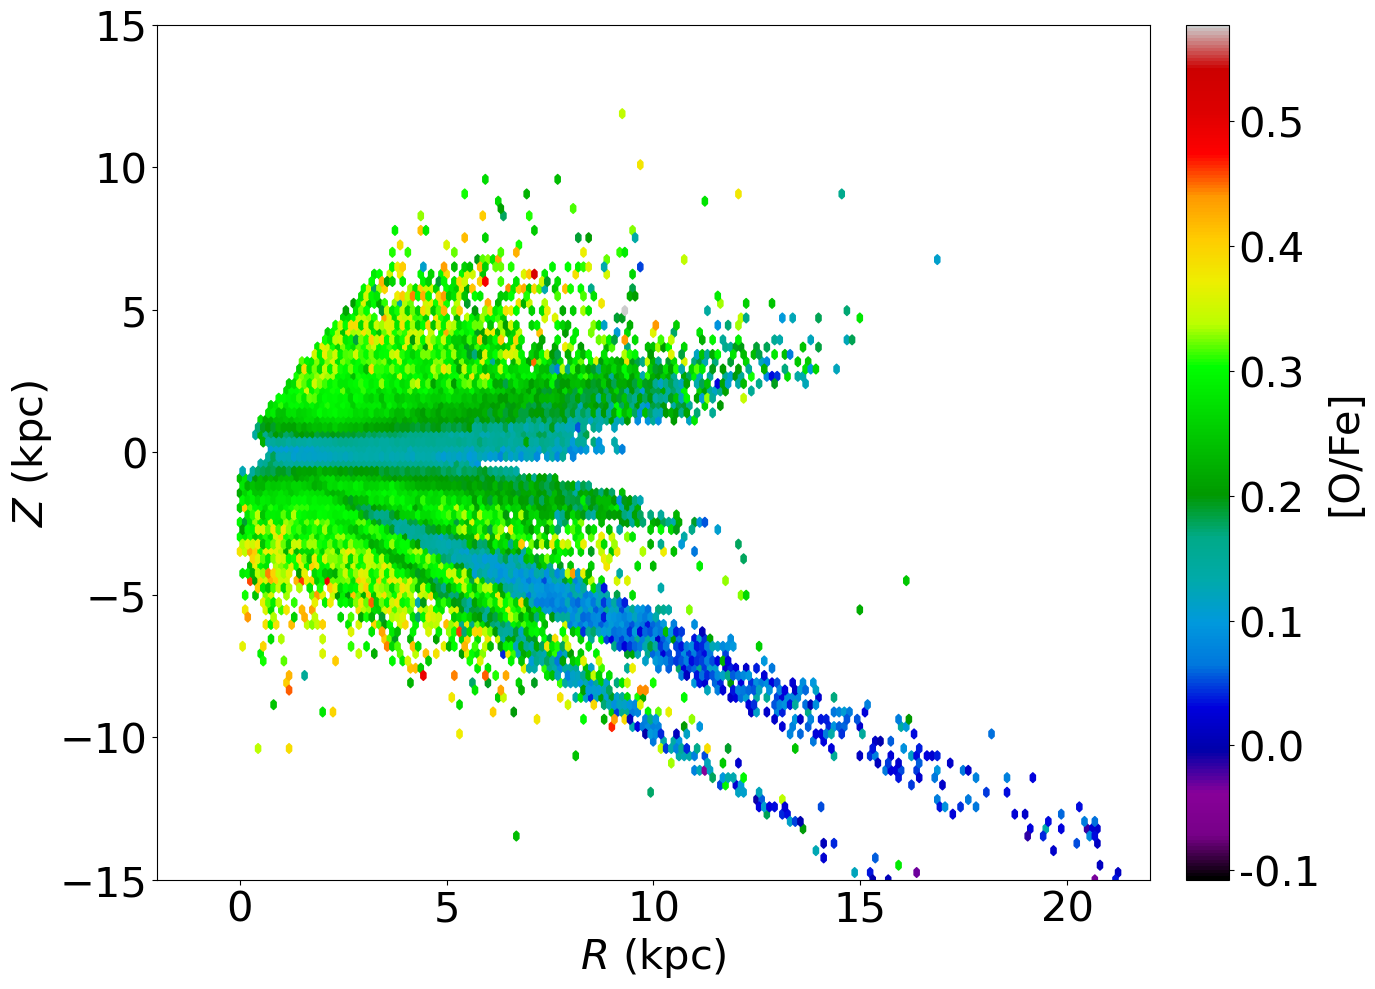

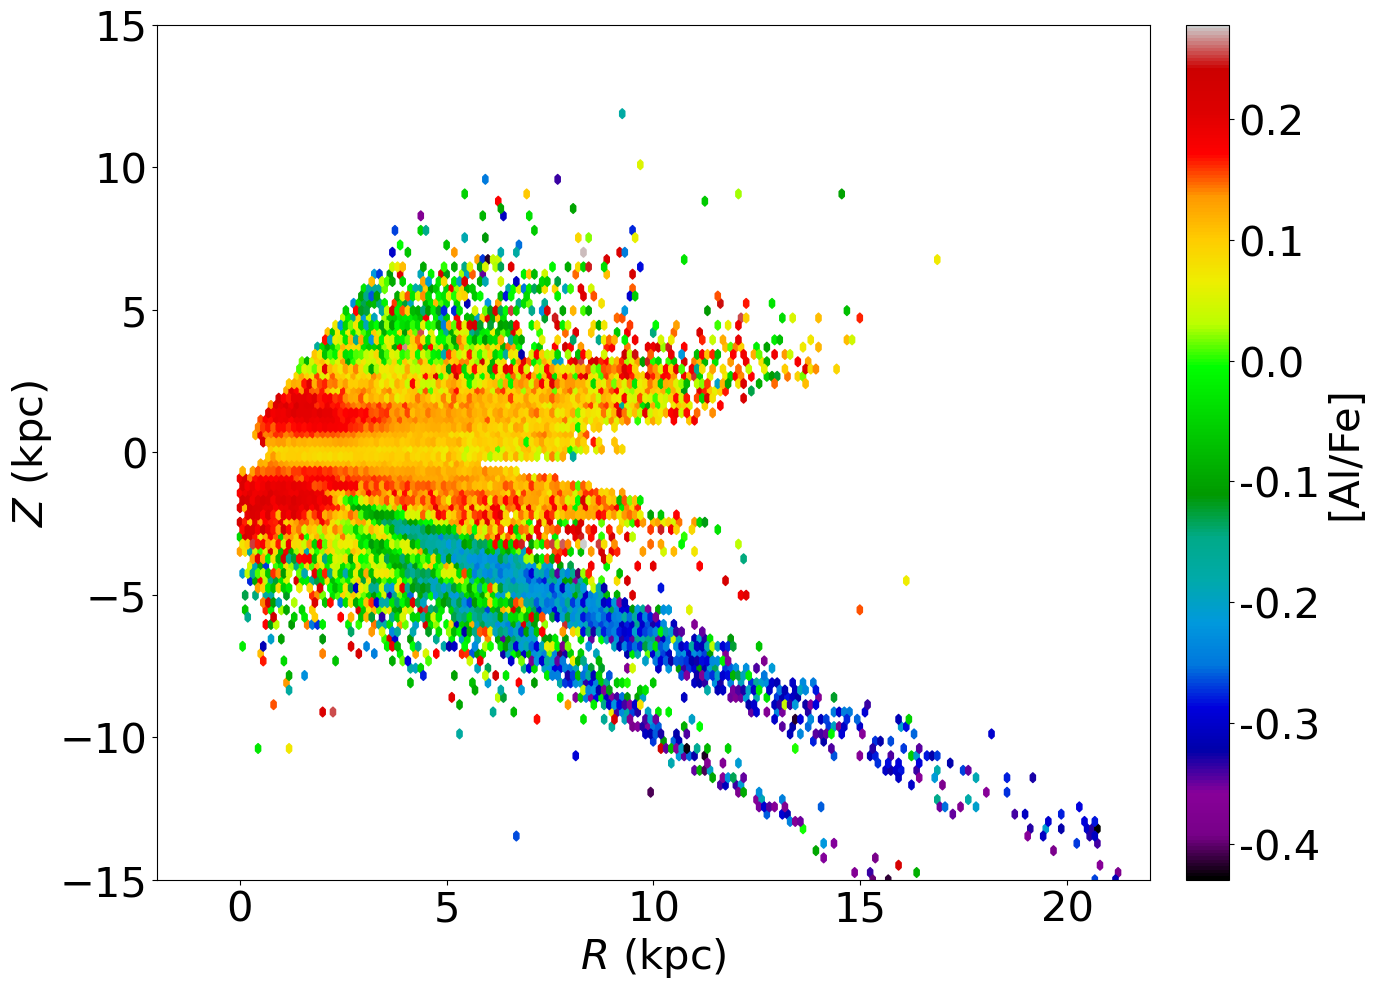

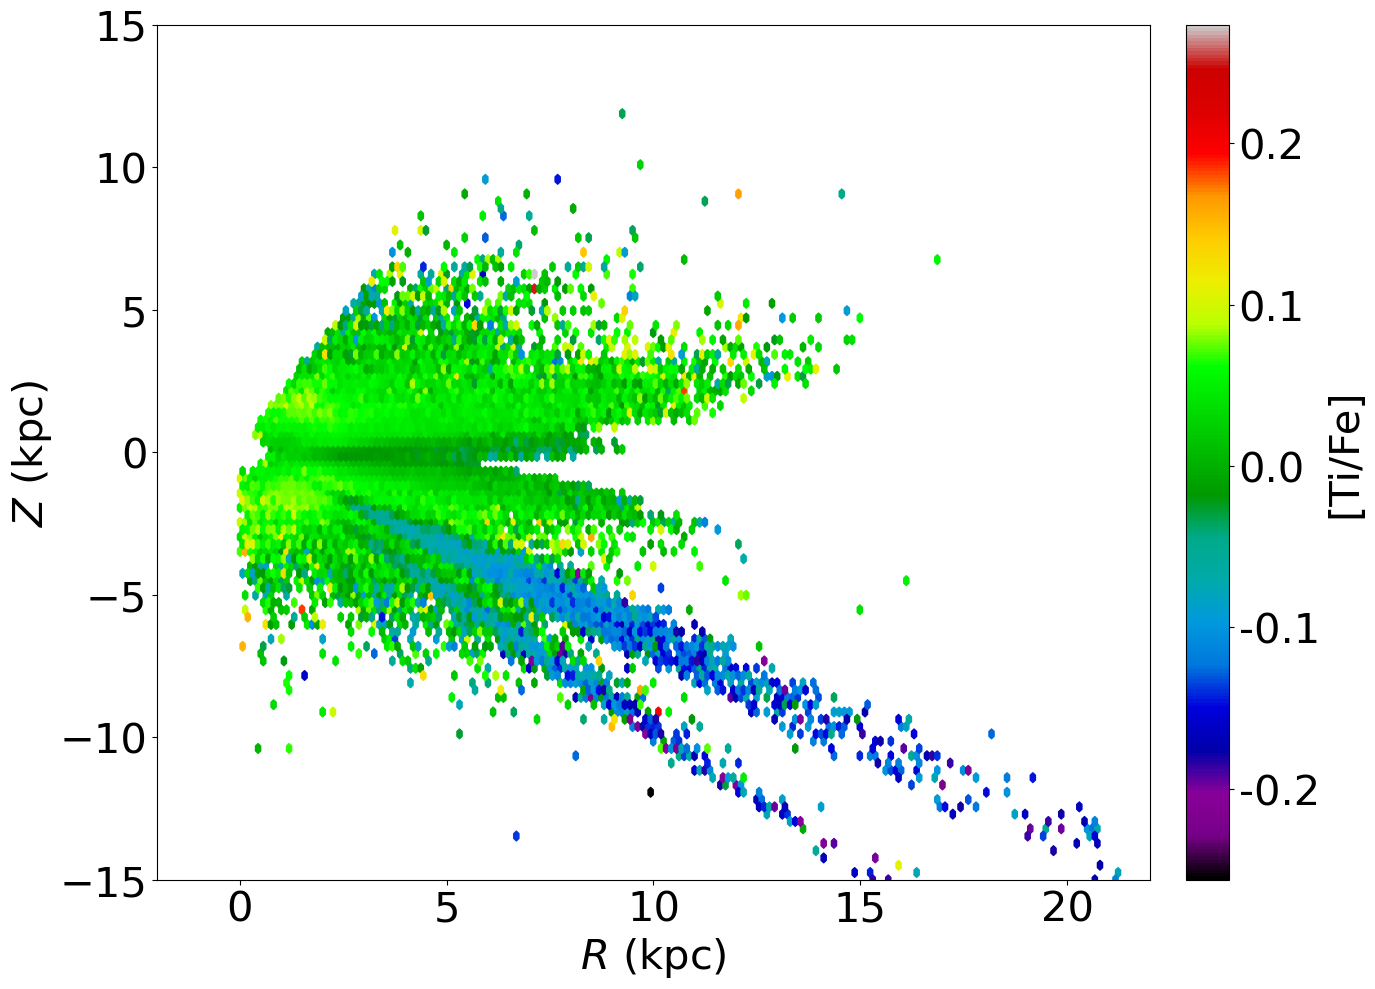

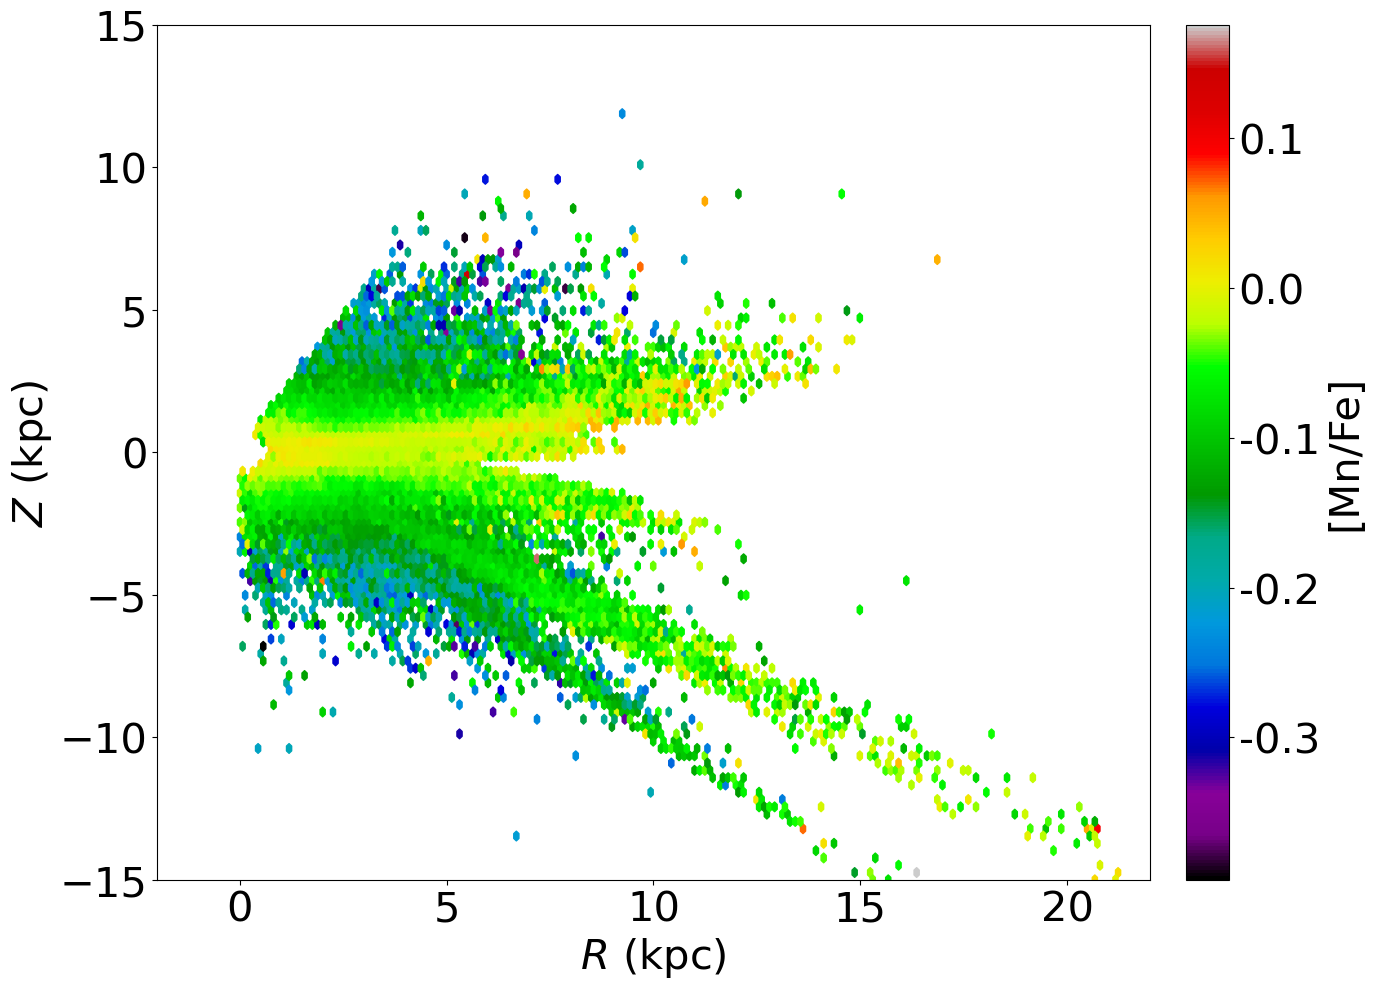

In [11]:
for column, label in column_label_mapping.items():
    plot_data(R, Z, df[column], 'nipy_spectral', label, save_with_mc=True)    
    

# Dropping MC

In [12]:
# Filter rows where ID column contains "STRIPE82"
filtered_df = df[~df['#ID'].str.contains('MC')]

In [13]:
filtered_ra = filtered_df["RA"]
filtered_dec = filtered_df["DEC"]

In [14]:
# distance from GAIA
filtered_D = filtered_df["Dist"] / 1000

In [15]:
filtered_X, filtered_Y, filtered_Z = estimate_cartesian_coordinates_ra_dec(filtered_D, filtered_ra, filtered_dec)

In [16]:
filtered_R = np.sqrt(filtered_X**2 + filtered_Y**2)

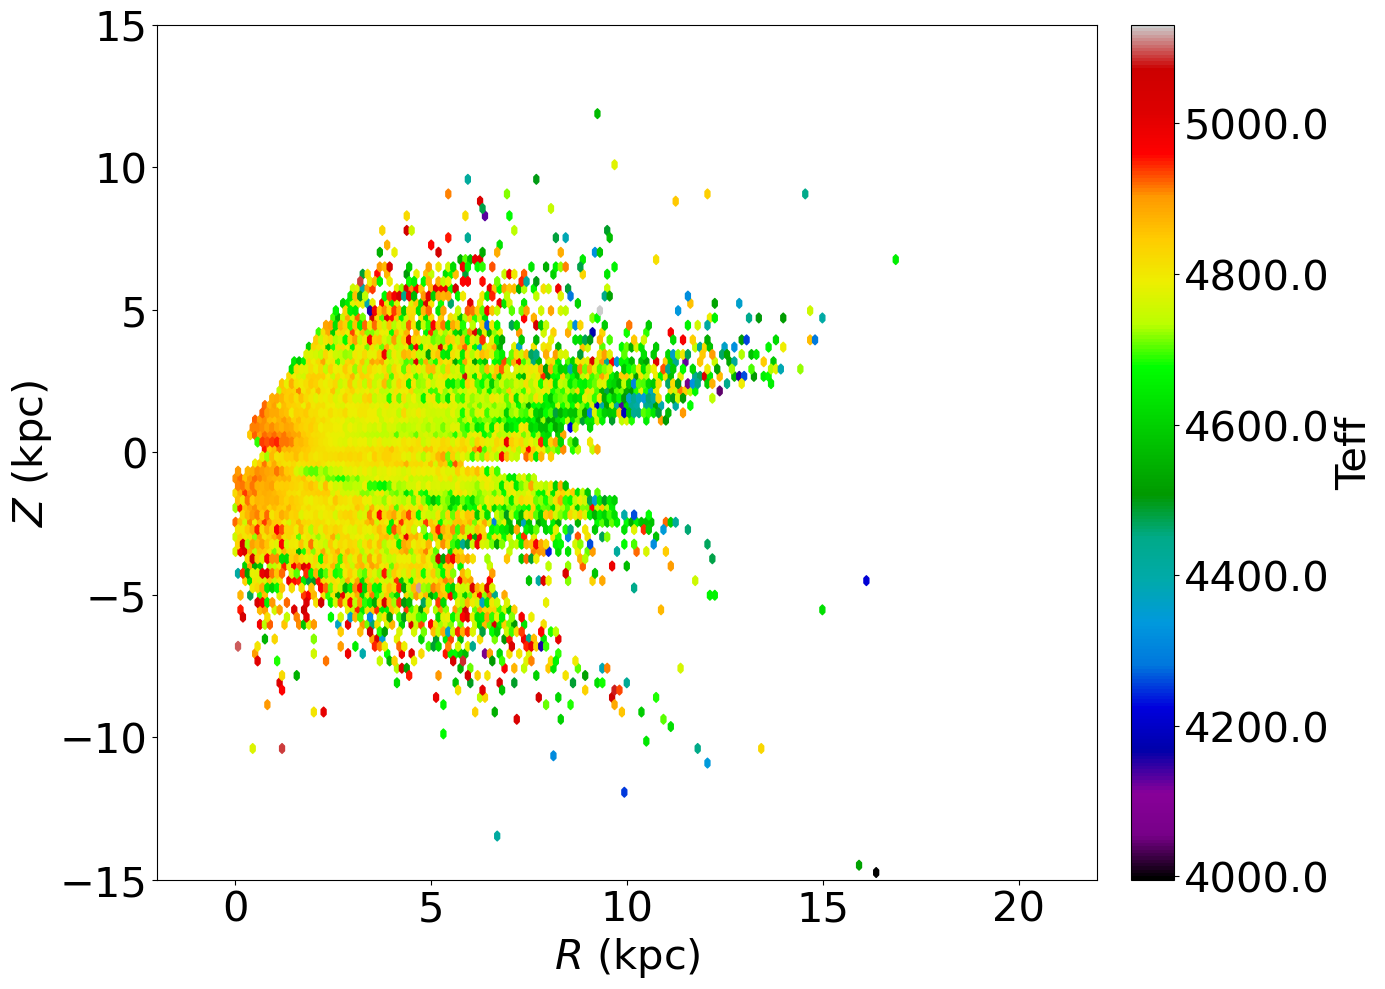

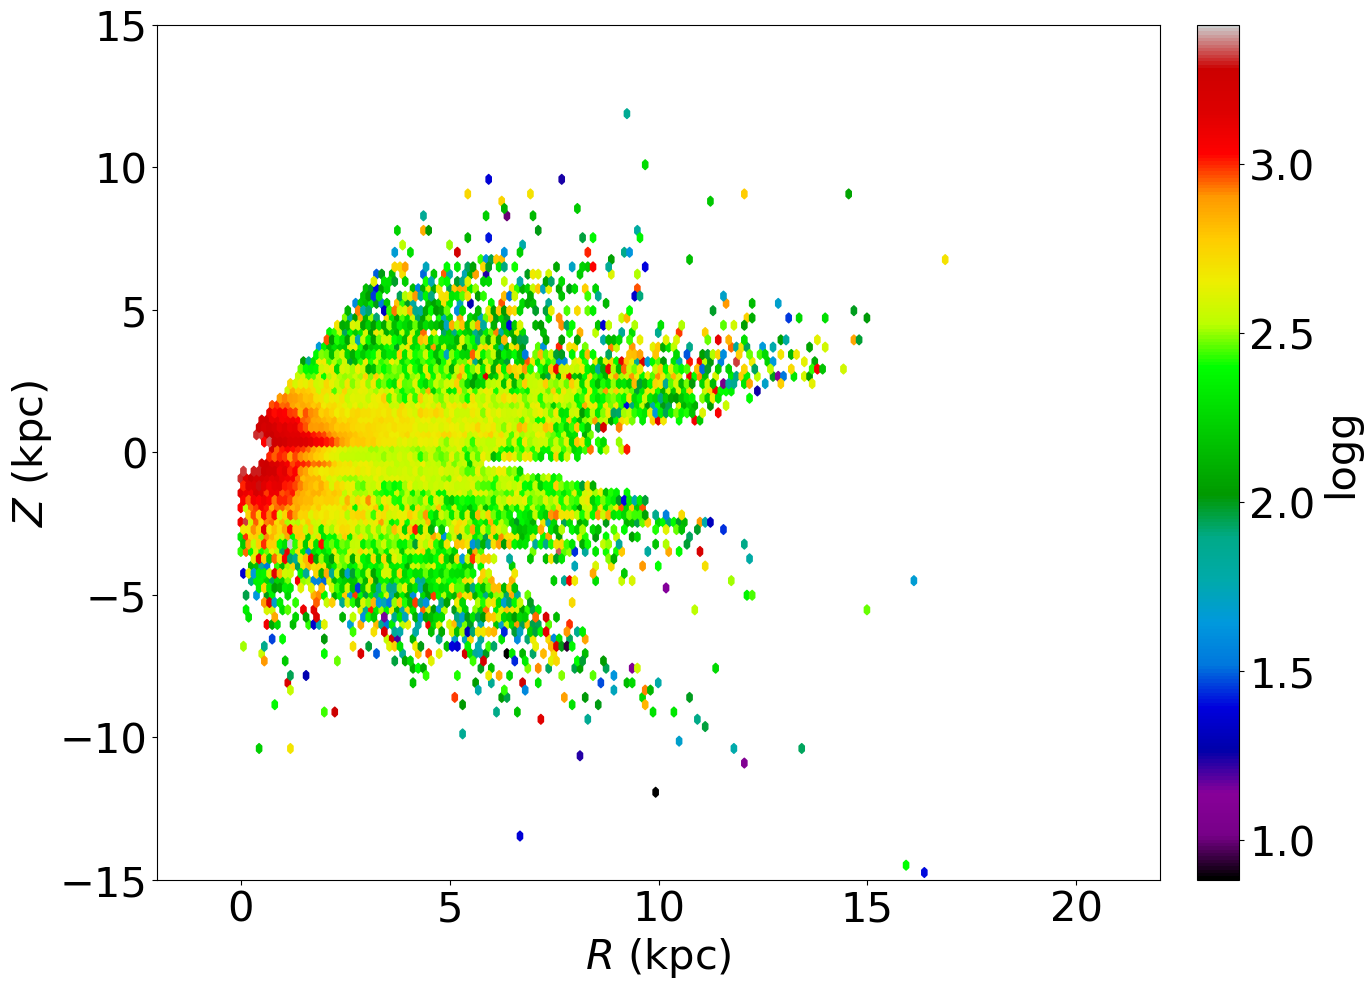

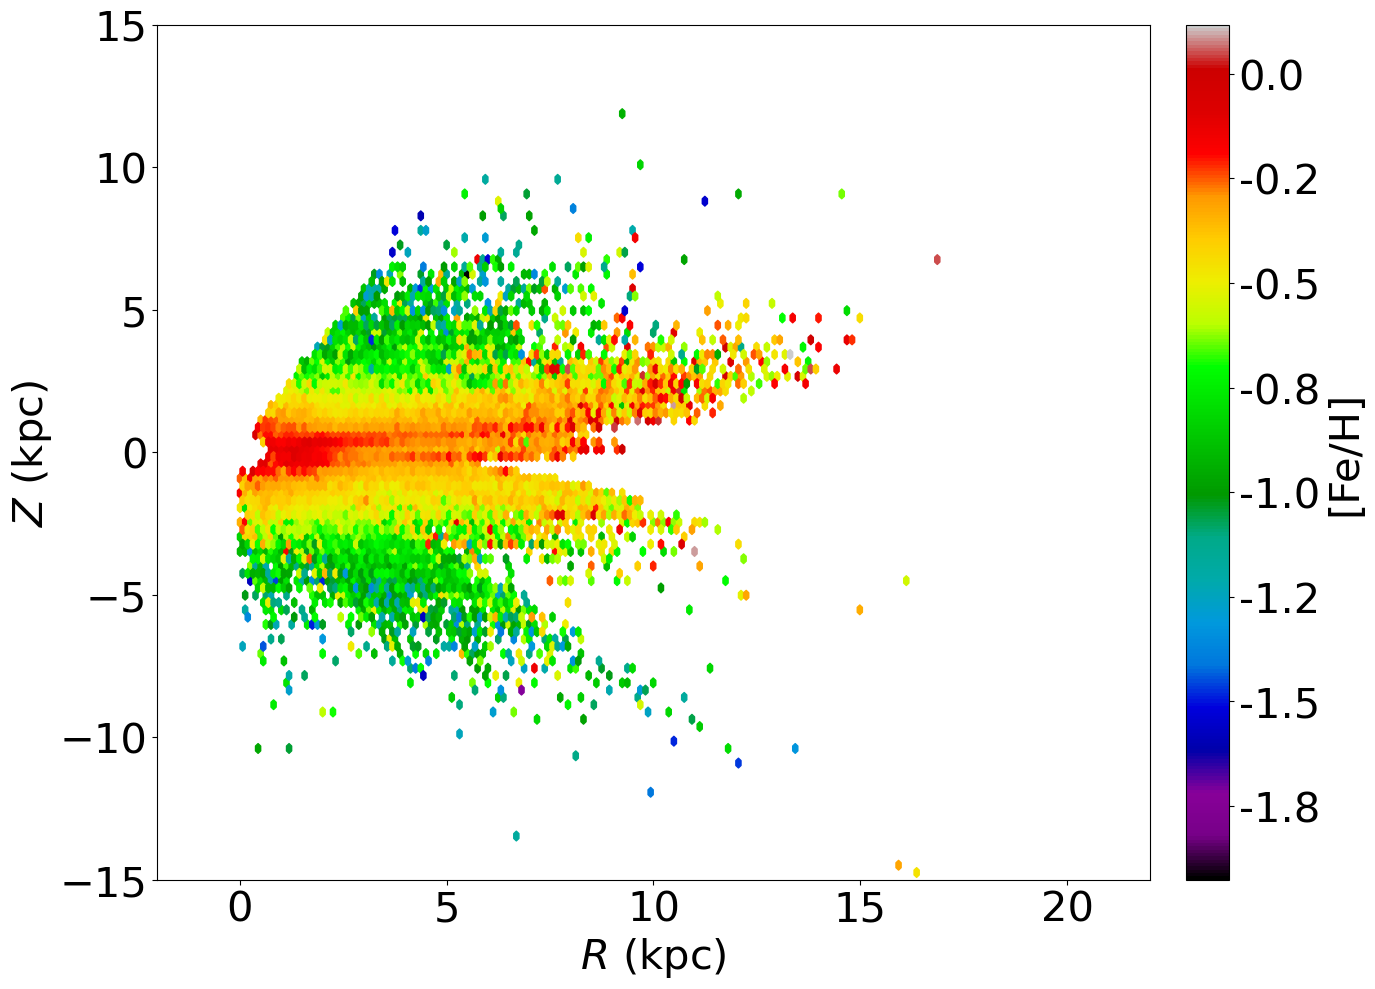

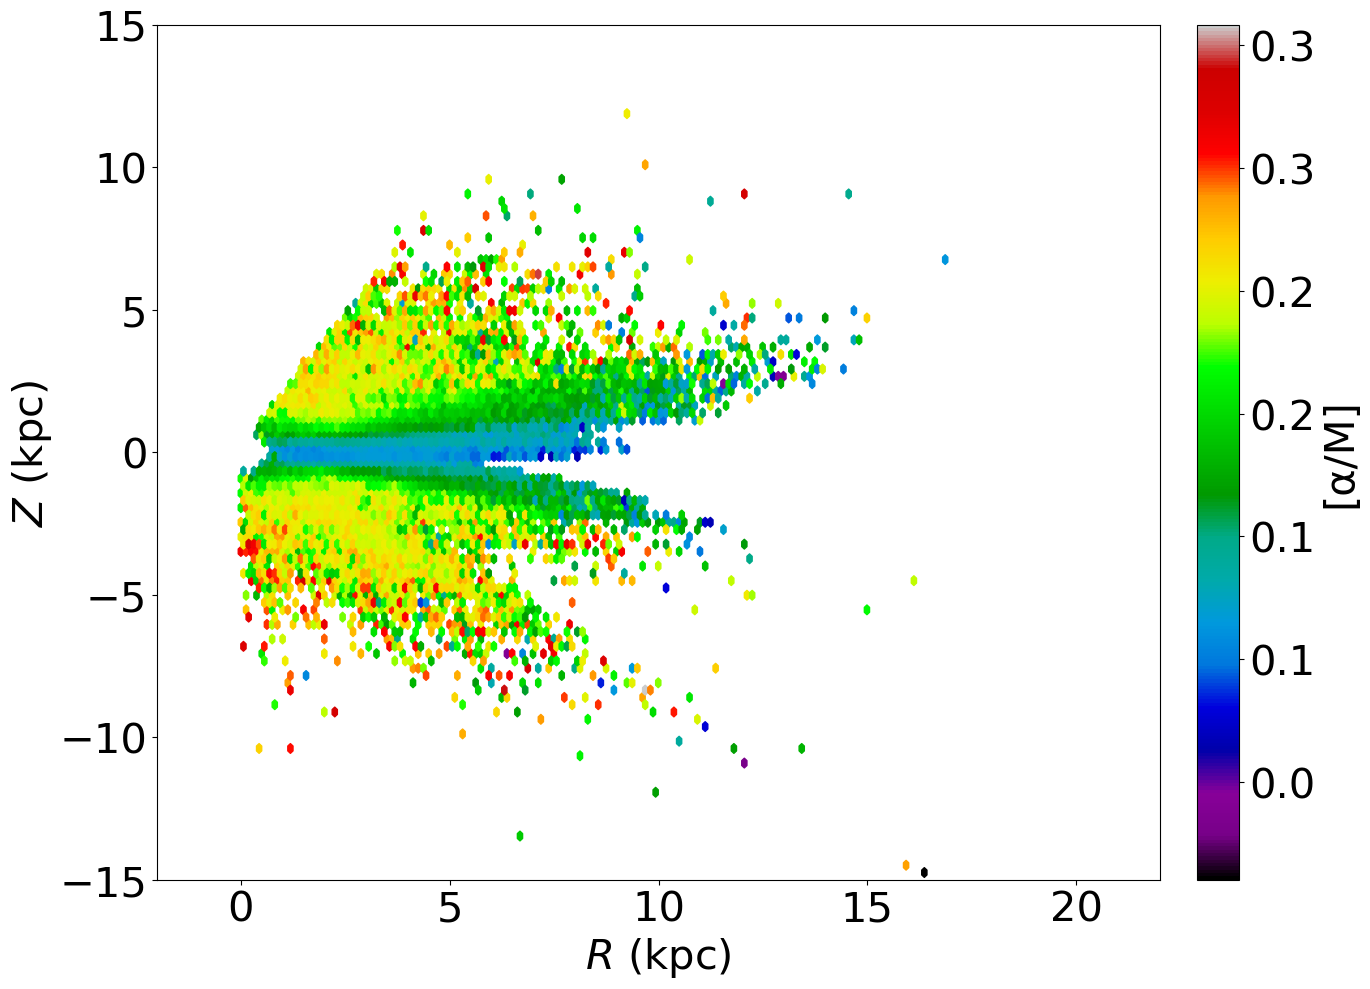

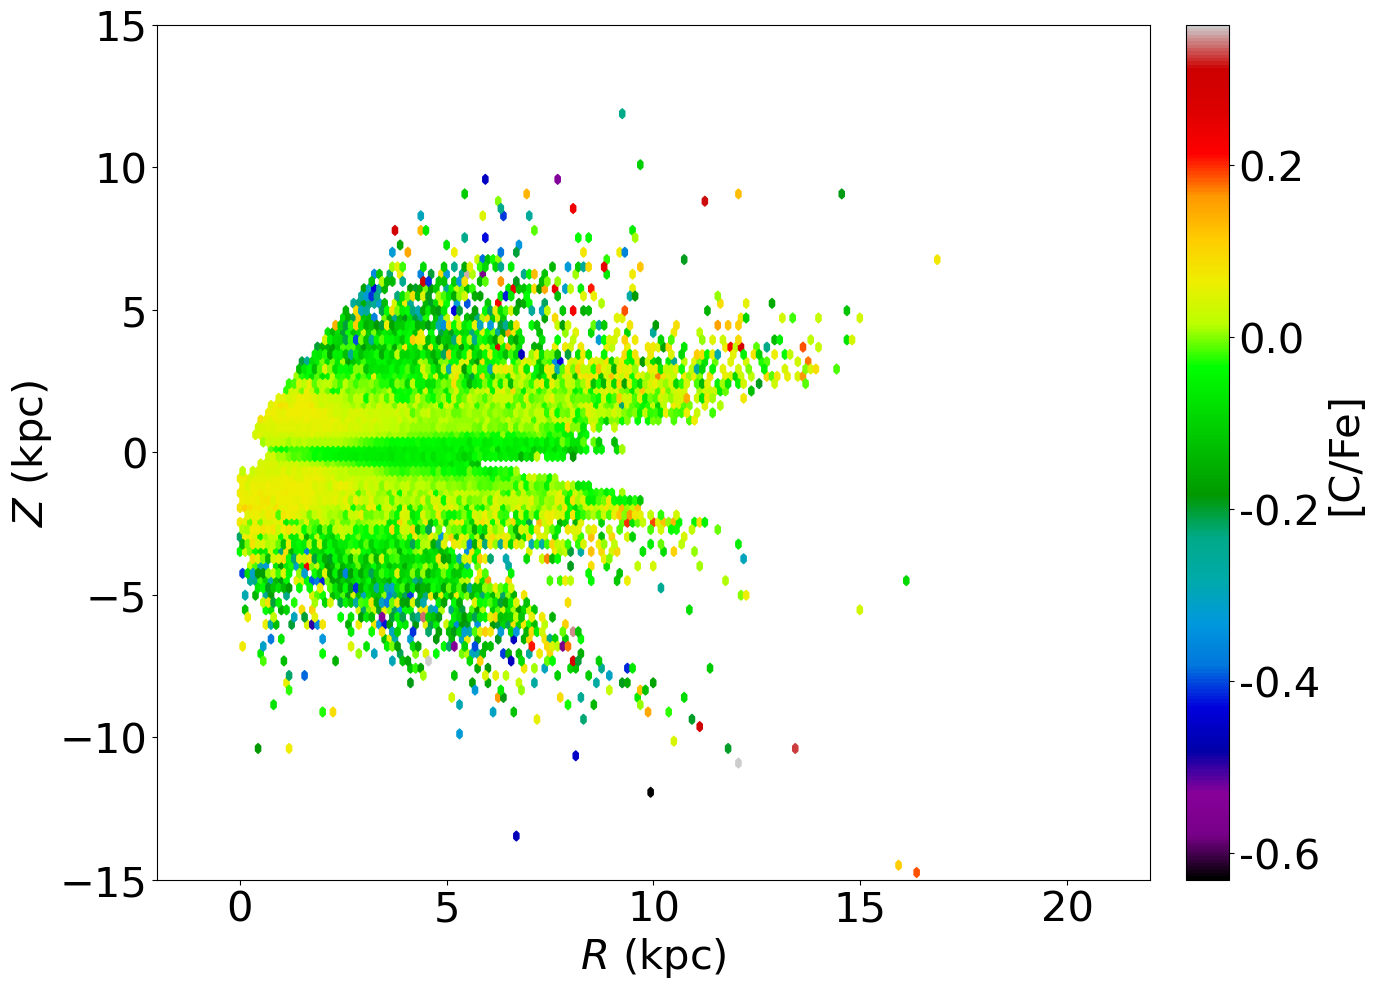

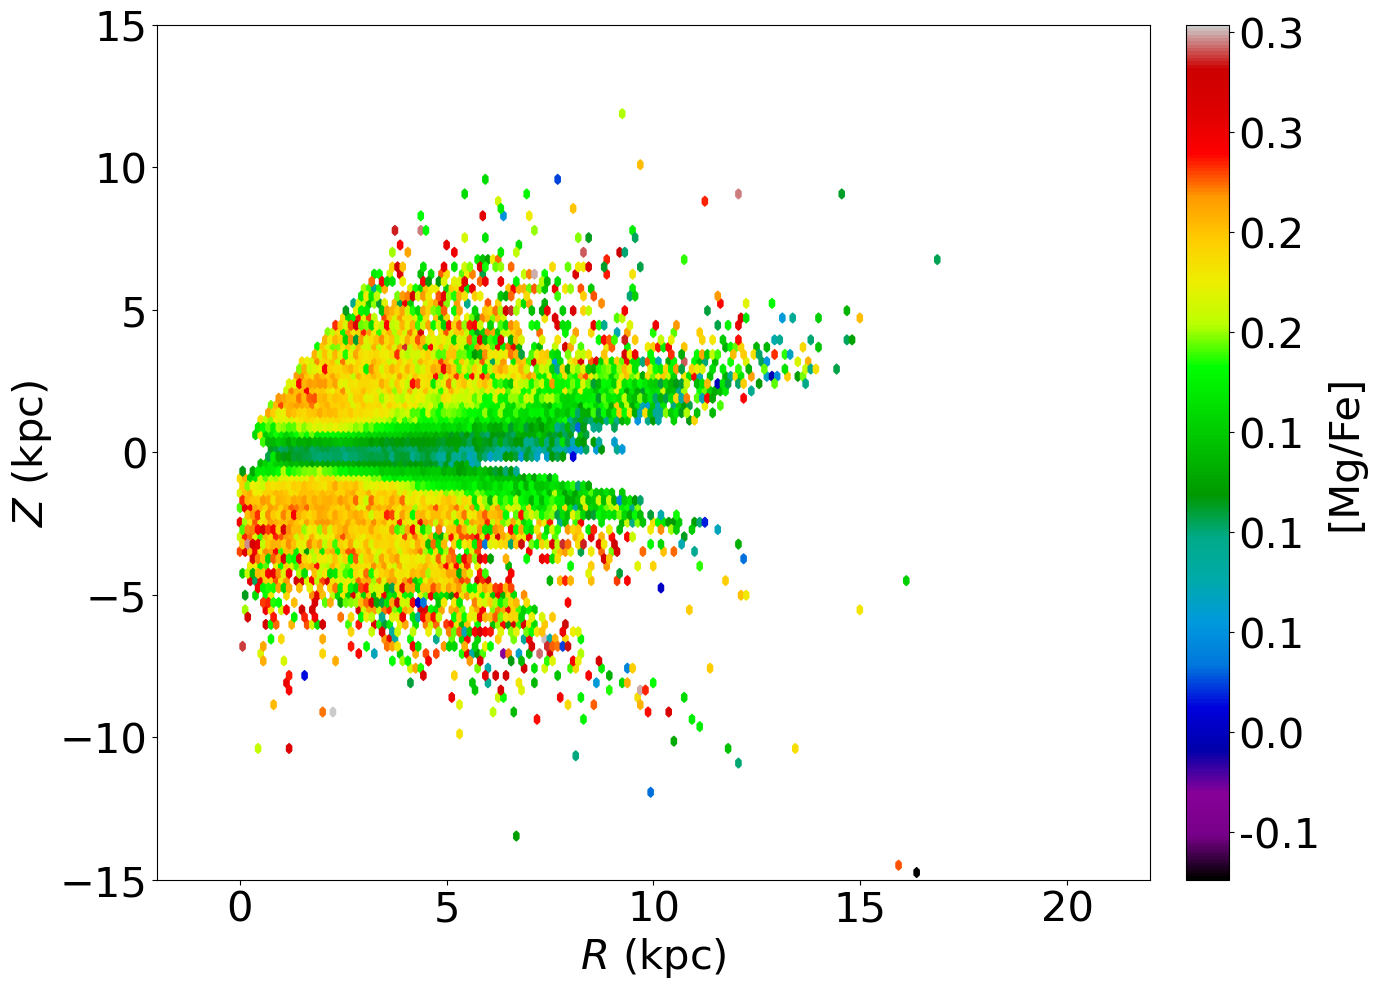

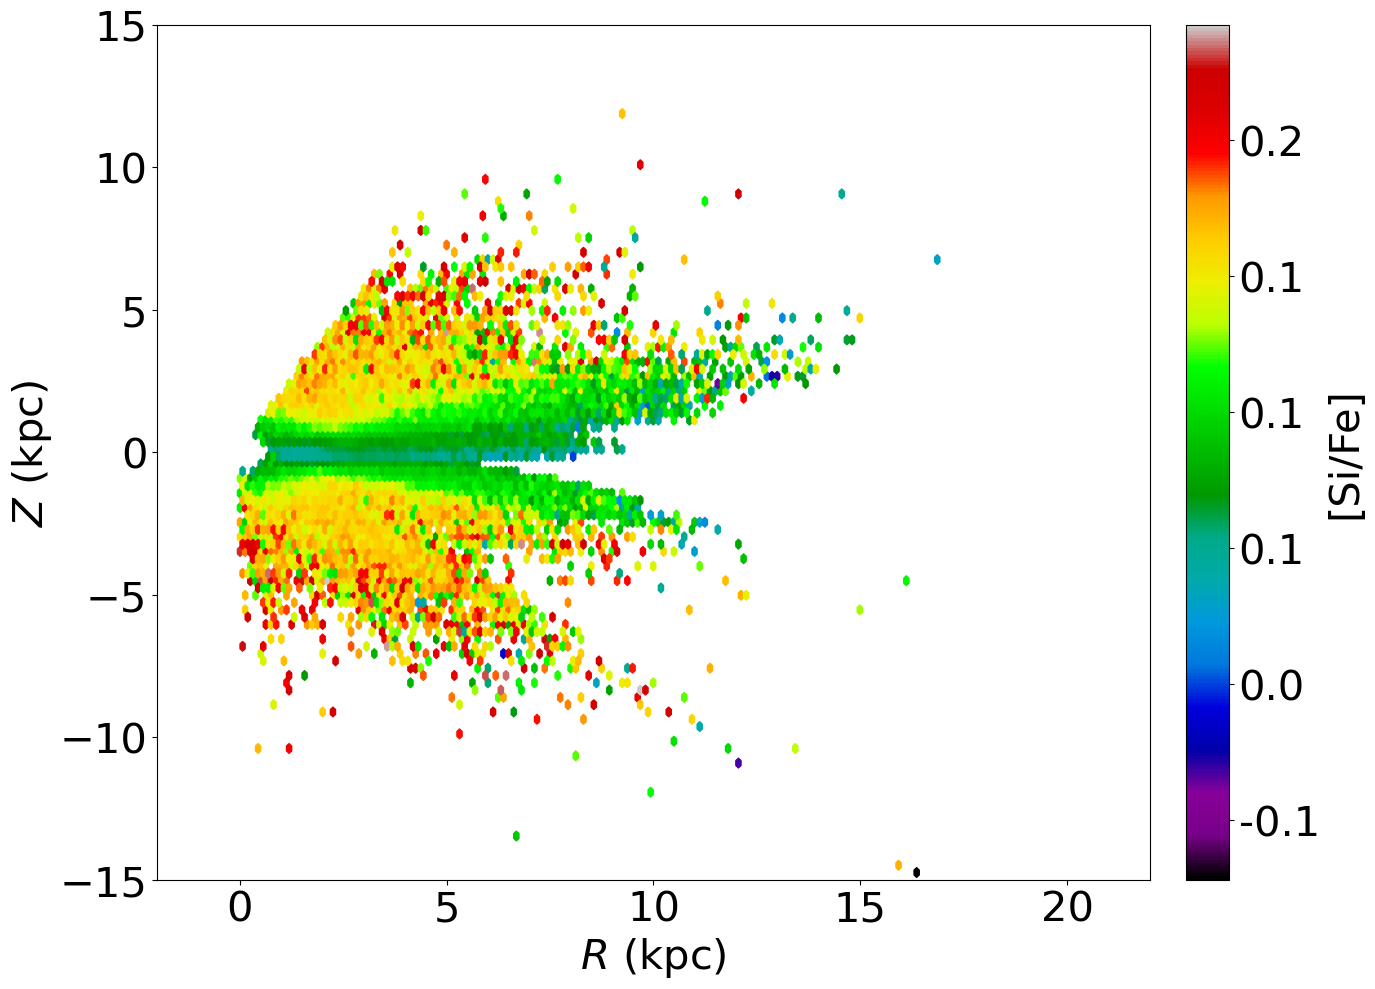

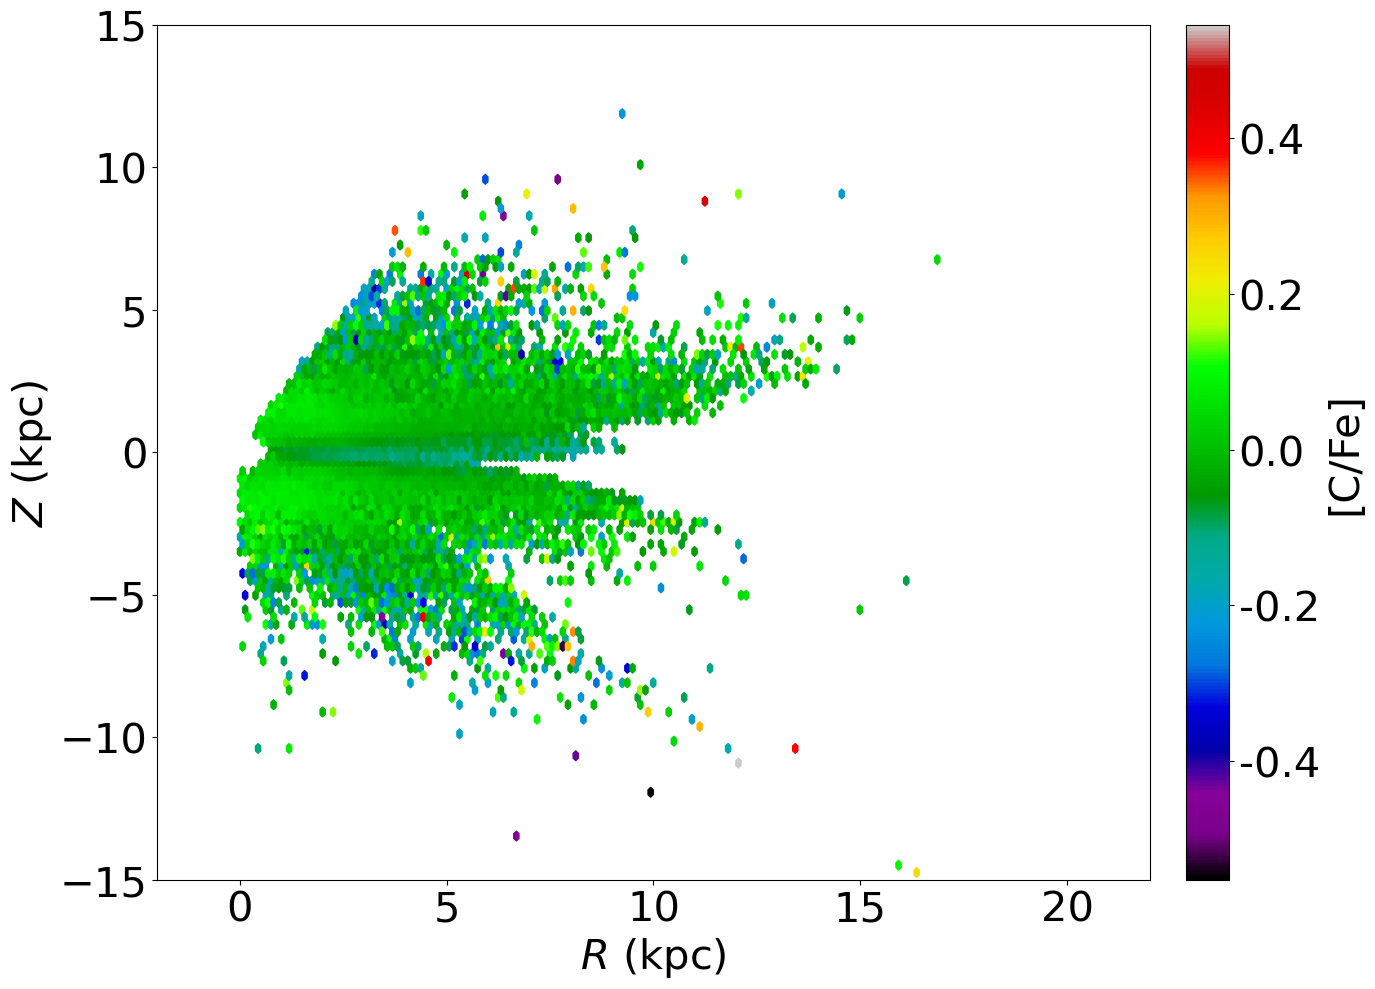

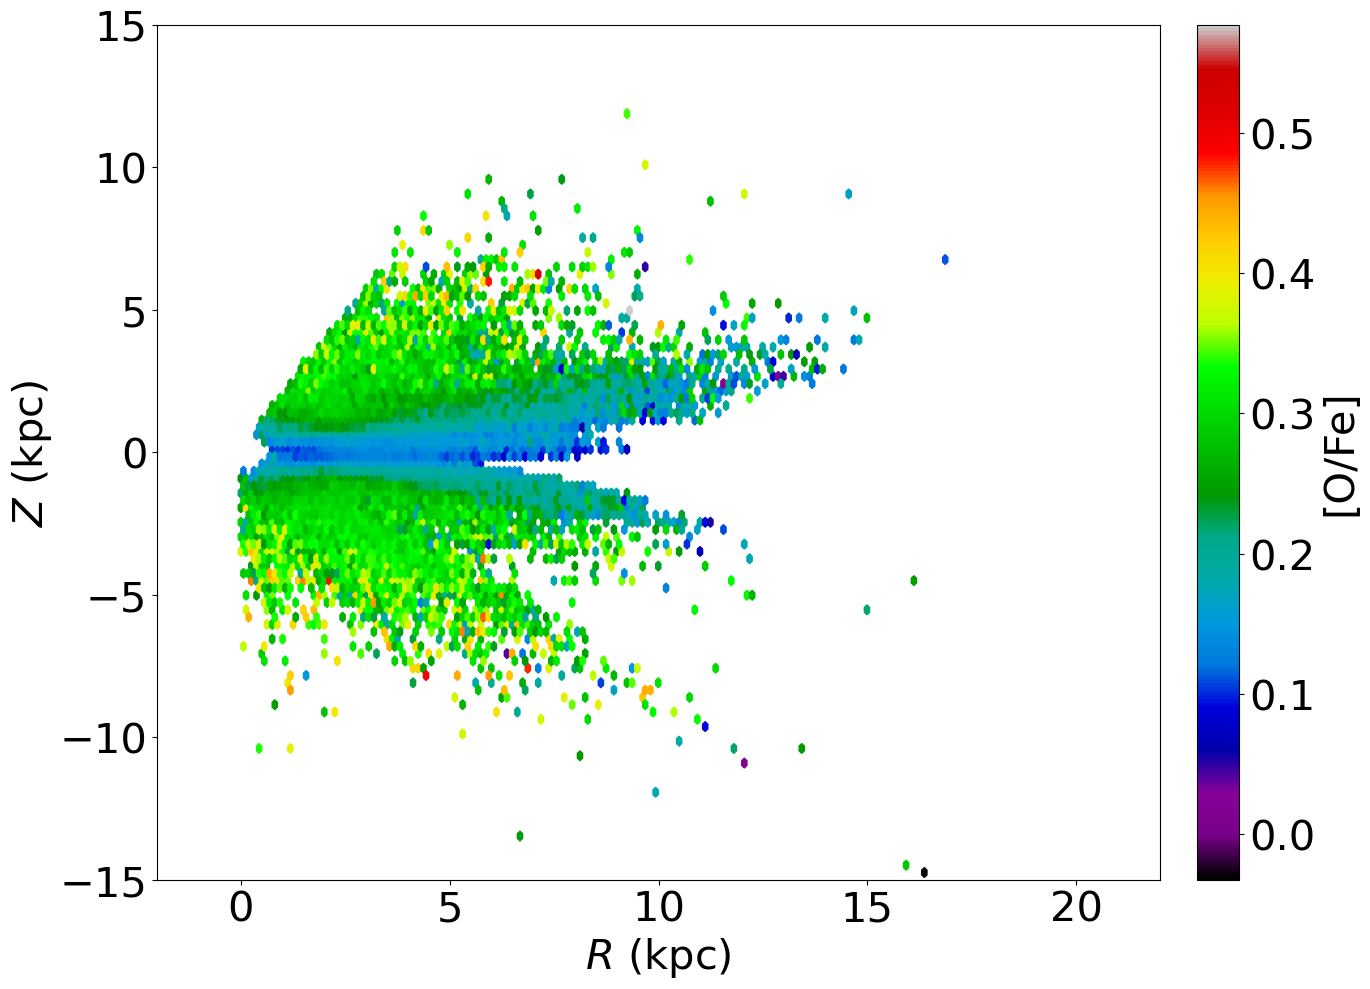

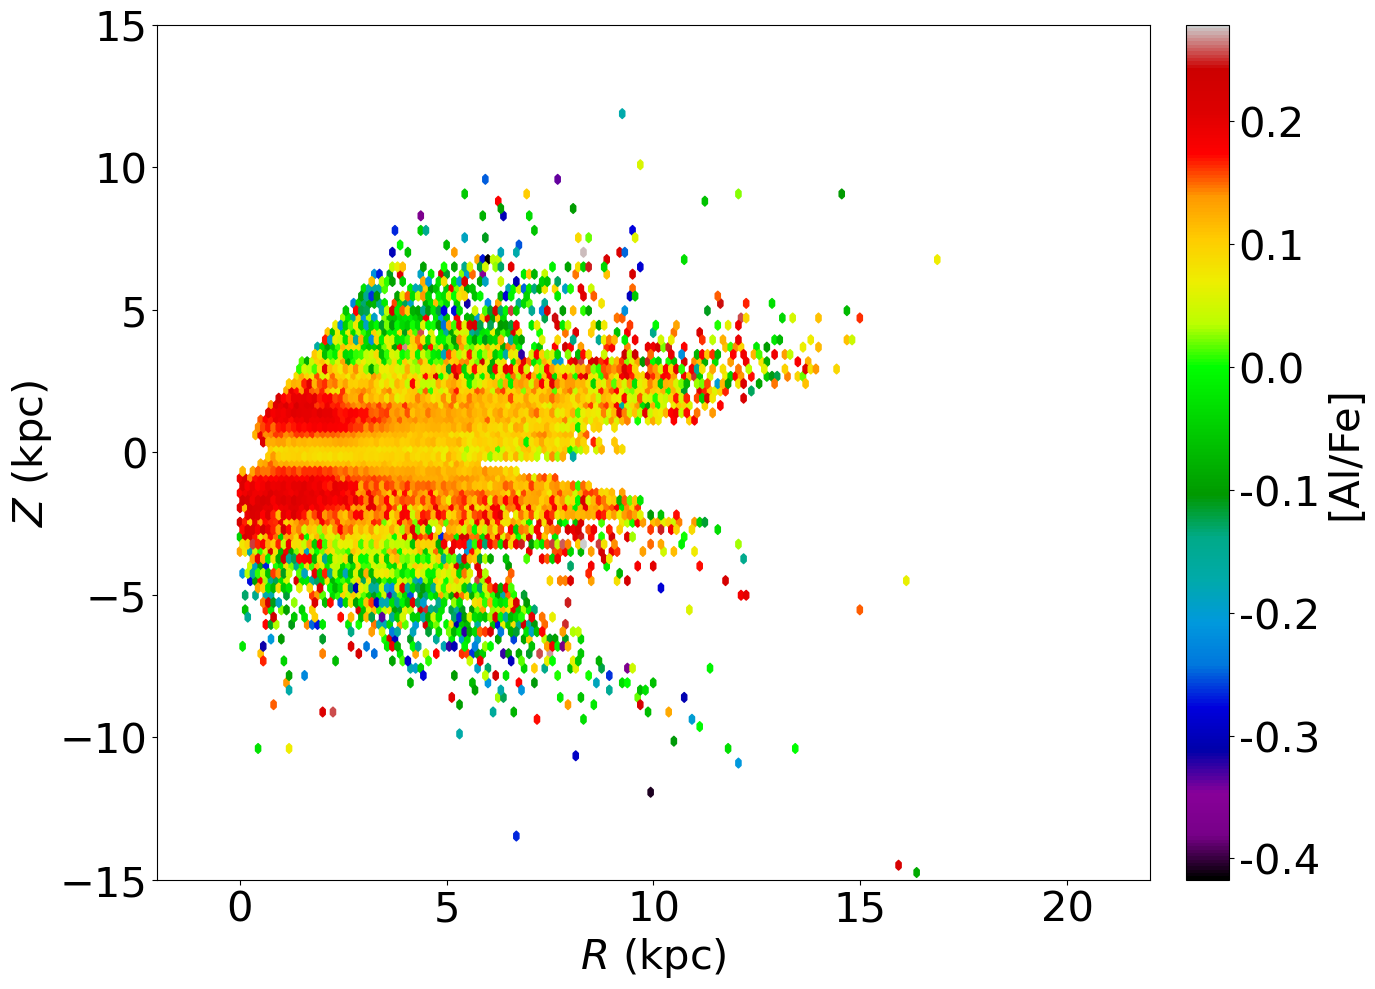

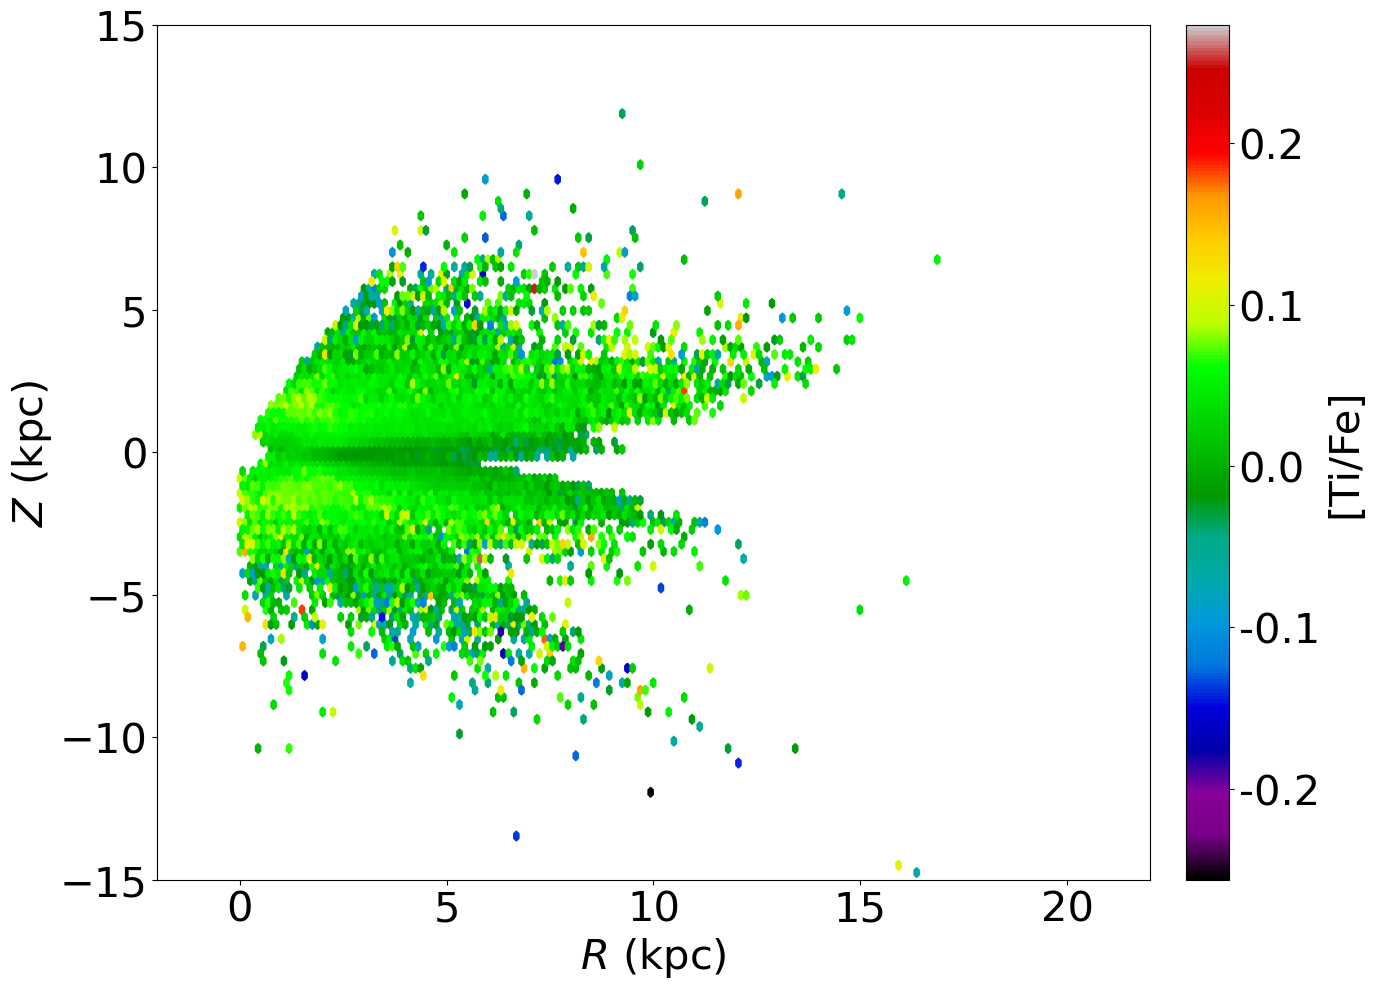

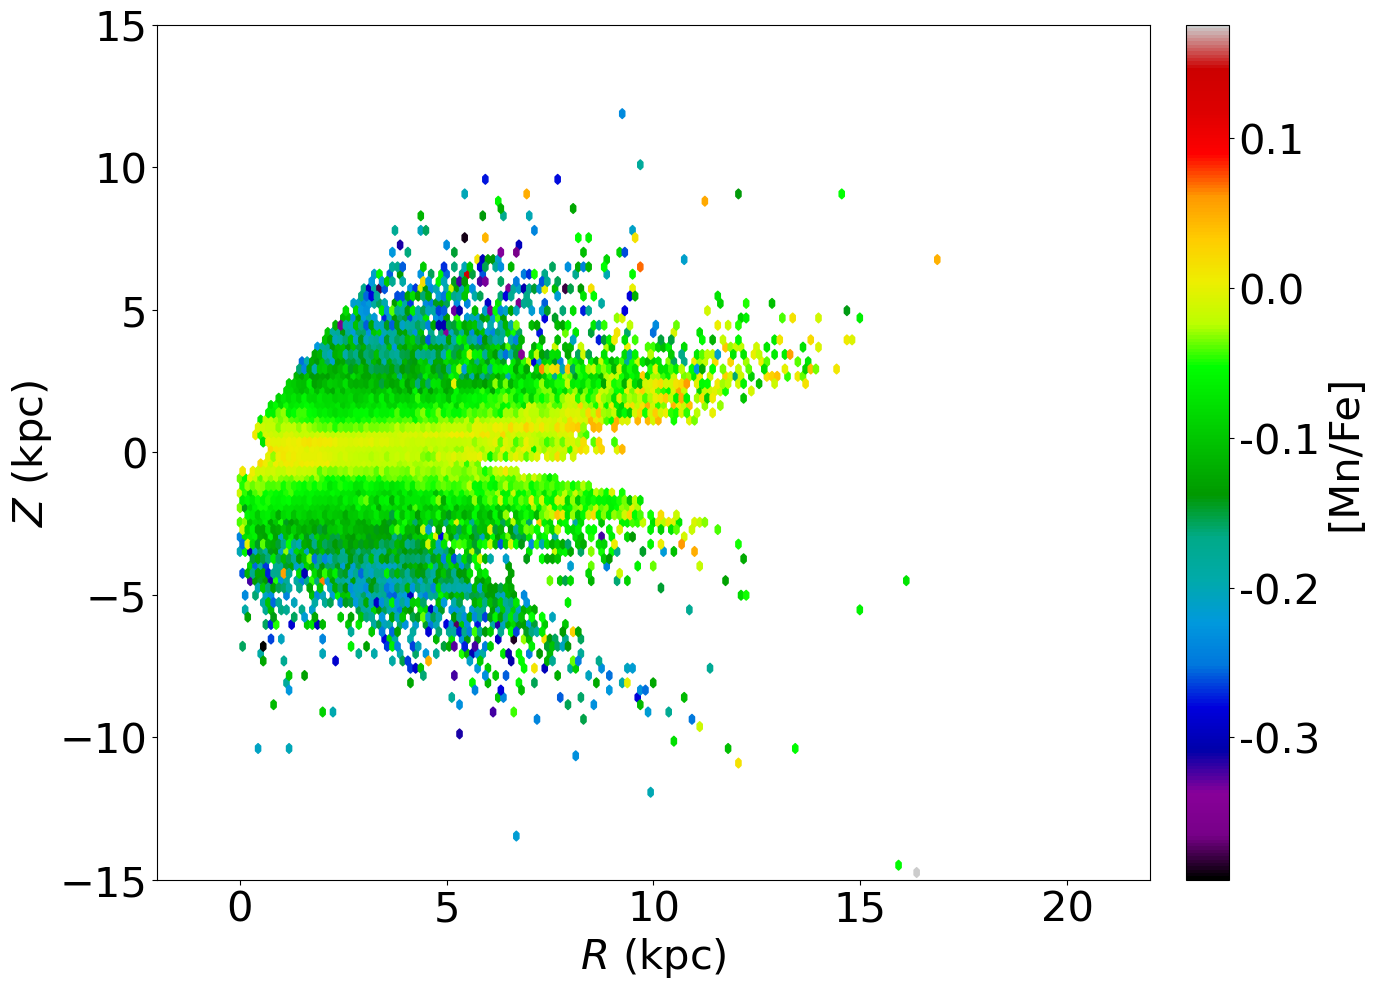

In [17]:
for column, label in column_label_mapping.items():
    plot_data(filtered_R, filtered_Z, filtered_df[column], 'nipy_spectral', label, save_with_mc=False)    
    